<a href="https://colab.research.google.com/github/20BCS6894/MainRepo/blob/main/RMF_KMEANS_20BCS6894.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [152]:
import datetime as dt
import missingno as msno
!pip install squarify
import squarify

In [153]:
#reading the xlsx file
cust_data = pd.read_excel('/content/Online Retail.xlsx')

In [154]:
#displaying the first few rows of dataset
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [155]:
#checking the data shape (it has 541909 rows and 8 cols)
cust_data.shape

(541909, 8)

In [156]:
cust_data.info()
# there are some columns that have none values as no of entries in info are unequal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [157]:
#looking at the mean std of numeric type cols
cust_data.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [158]:
#finding the no of null values in cols
cust_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

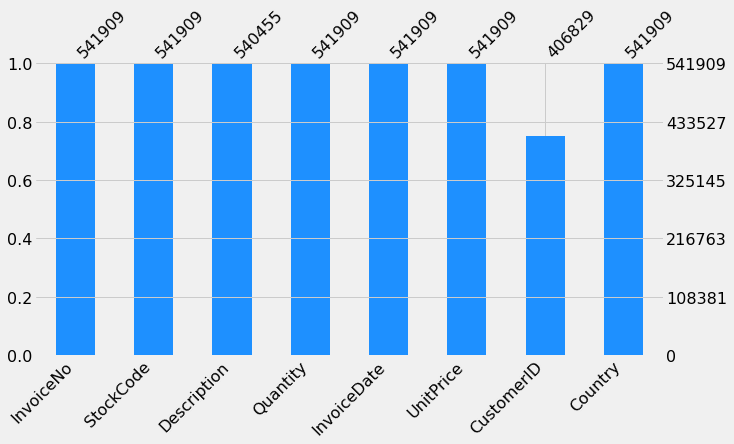

In [159]:
#let us visualize the missing values using mnso lib
msno.bar(cust_data,color = 'dodgerblue',figsize=(10,5))
#we can see CustomerID and Description have missing values

In [160]:
#dropping rows with missing values
cust_data.dropna(inplace=True)


In [161]:
cust_data.shape
#rows with missing values have been dropped

(406829, 8)

In [162]:
cust_data.describe().T
#we can see the quantity col have min as -ve values which shouldnt be there these rows have to removed as well

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [163]:
#ewmoving the rows with val of quantity as < 0
cust_data.drop(cust_data[cust_data['Quantity'] <= 0].index,inplace=True)
cust_data.shape

(397924, 8)

In [164]:
#ewmoving the rows with val of unitprice as < 0

cust_data.drop(cust_data[cust_data['UnitPrice'] <= 0].index,inplace=True)
cust_data.shape

(397884, 8)

In [165]:
#changing the type of CustID col to obj
cust_data['CustomerID'] = cust_data['CustomerID'].astype(int)
cust_data['CustomerID'] = cust_data['CustomerID'].astype(str)
cust_data['CustomerID'].dtype


dtype('O')

In [166]:
#checking whether all custID are of same length or not i.e 5  
for cust_id in cust_data['CustomerID']:
    if len(cust_id) !=5:
        print(id)
print("all CustomerID are of len 5")

all CustomerID are of len 5


In [167]:
#finding duplicate records with same invoice nos
recs_duplicate = cust_data[cust_data.duplicated('InvoiceNo')] 
recs_duplicate
#since the stockcode of item for each invoice is different dropping them can be avoided

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [168]:
#analysing the data on basis of numerical col in further sections
cust_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75


In [169]:
#finding entry with max quantity
cust_data[cust_data.Quantity == cust_data.Quantity.max()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [170]:
#finding entries with min quantity

cust_data[cust_data.Quantity == cust_data.Quantity.min()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom
115,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom
118,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom
...,...,...,...,...,...,...,...,...
541851,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,2011-12-09 12:20:00,1.95,12748,United Kingdom
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748,United Kingdom
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09 12:20:00,2.95,12748,United Kingdom
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748,United Kingdom


In [171]:
#finding entry with max unitprice

cust_data[cust_data.UnitPrice == cust_data.UnitPrice.max()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [172]:
#finding entry with min unitprice

cust_data[cust_data.UnitPrice == cust_data.UnitPrice.min()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom


In [173]:
#entries with uk as country
cust_data[cust_data.Country == 'United Kingdom']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom


In [174]:
#finding unique countries in the dataset
cust_data['Country'].unique()


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [175]:
#finding entries per country 
cust_data['Country'].value_counts()


United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [176]:
#seeing the no of time which article sold how much  
cust_data['Description'].value_counts()


WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

In [177]:
#seeing quantity max by country
gb =cust_data.groupby('Country').Quantity.max()
gb


Country
Australia                1152
Austria                   288
Bahrain                    96
Belgium                   272
Brazil                     24
Canada                    504
Channel Islands           407
Cyprus                    288
Czech Republic             72
Denmark                   256
EIRE                     1440
European Community         24
Finland                   144
France                    912
Germany                   600
Greece                     48
Iceland                   240
Israel                    100
Italy                     200
Japan                    2040
Lebanon                    24
Lithuania                  48
Malta                      48
Netherlands              2400
Norway                    240
Poland                     72
Portugal                  120
RSA                        12
Saudi Arabia               12
Singapore                 288
Spain                     360
Sweden                    768
Switzerland               288
US

In [178]:
cust_data['InvoiceDate'].dtypes


dtype('<M8[ns]')

In [179]:
#seperating the numerical cols in numerical_variables
numerical_variables = [feature for feature in cust_data.columns if (cust_data[feature].dtypes != 'O' and cust_data[feature].dtypes !='<M8[ns]')]
numerical_variables

['Quantity', 'UnitPrice']

In [180]:
cust_data['InvoiceDate']


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [181]:
#creating year col from invoice date
cust_data['YearOfSale'] = pd.DatetimeIndex(cust_data['InvoiceDate']).year
cust_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011


In [182]:
#finding correlation b/w numerical cols i.e UP and quantity
cust_data_corr = cust_data[numerical_variables].corr()


In [183]:
#correlation b/w Up and Quantity
cust_data_corr

,Quantity,UnitPrice
Quantity,1.000000,-0.004563
UnitPrice,-0.004563,1.000000


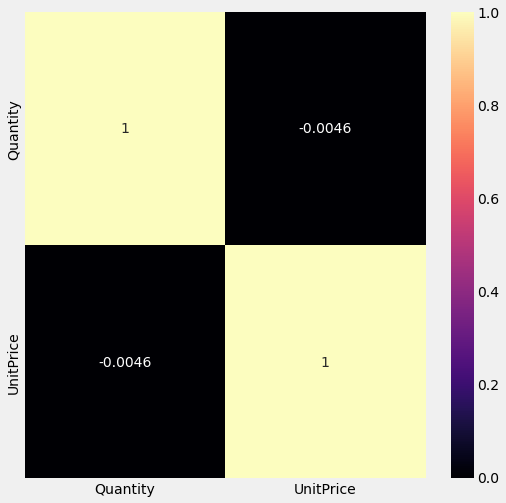

In [184]:
#heatmap b/w Up and Quantity

fig, ax = plt.subplots(figsize=(8,8))
heat_map = sns.heatmap(cust_data_corr,annot=True,cmap="magma",ax=ax)

In [185]:
#seeing top 5 countries by quantity
cust_data.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5]


Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Name: Quantity, dtype: int64

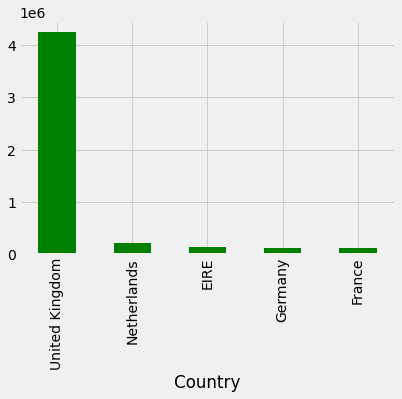

In [186]:
#plotting countries by quantity
cust_data.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar',color = 'green')


In [187]:
cust_data['YearOfSale'].unique()


array([2010, 2011])

In [188]:
#quantity by year of sales
cust_data.groupby(['YearOfSale'])['Quantity'].sum()


YearOfSale
2010     312265
2011    4855547
Name: Quantity, dtype: int64

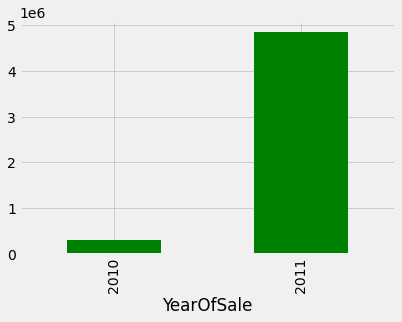

In [189]:
#plotting quantity by year of sales
cust_data.groupby(['YearOfSale'])['Quantity'].sum().plot(kind='bar',color = 'green')


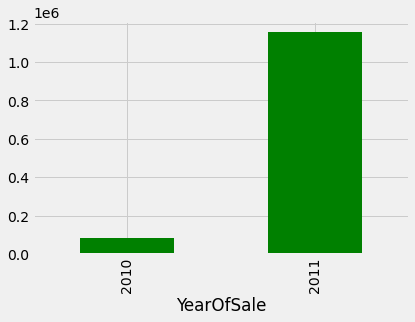

In [190]:
#Unit price by year of sales

cust_data.groupby(['YearOfSale'])['UnitPrice'].sum().plot(kind='bar',color = 'green')


In [191]:
#invoice no by quantity
cust_data.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10]


InvoiceNo
581483    80995
541431    74215
556917    15049
563076    14730
572035    13392
567423    12572
552883    12266
563614    12196
562439    11848
548011    11116
Name: Quantity, dtype: int64

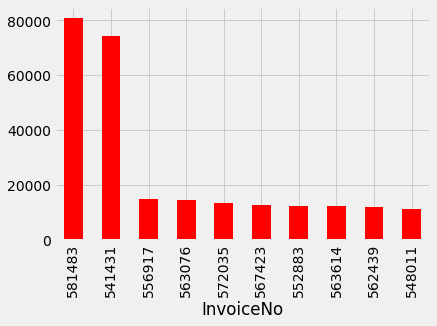

In [192]:
#plotting invoice_no by quantity
cust_data.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar',color = 'red')


In [193]:
############## RFM Analysis ################


In [194]:
cust_data['InvoiceDate']


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [195]:
cust_data['InvoiceNo']


0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397884, dtype: object

In [196]:
cust_data[['Quantity','UnitPrice']]


,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [197]:
#creating price column in cust_data
cust_data['Price'] = cust_data['Quantity'] * cust_data['UnitPrice']


In [198]:
cust_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,20.34


In [199]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
 8   YearOfSale   397884 non-null  int64         
 9   Price        397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 33.4+ MB


In [200]:
#finding no of unique countries
cust_data.Country.nunique()


37

In [201]:
#printing min and max of invoice date
print(cust_data['InvoiceDate'].min())
print(cust_data['InvoiceDate'].max())


2010-12-01 08:26:00
2011-12-09 12:50:00


In [202]:
Now = dt.datetime(2011,12,10)
Now


datetime.datetime(2011, 12, 10, 0, 0)

In [203]:
#changing format of invoice date to datetime
cust_data['InvoiceDate']=pd.to_datetime(cust_data['InvoiceDate'])


In [204]:
cust_data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [205]:
# creating the RFM table

In [206]:
#creating rfmtable by grouping by cust ID
rfmTable = cust_data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Now - x.max()).days,
                                         'InvoiceNo' : lambda x :len(x),'Price' : lambda x :sum(x) })

In [207]:
#renaming cols of rfm table
rfmTable.rename(columns ={'InvoiceDate' : 'Recency', 'InvoiceNo' :'Frequency',
                          'Price':'Monetary_Value'},inplace = True)

In [208]:
rfmTable.head(10)

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40
12352,36,85,2506.04
12353,204,4,89.00
12354,232,58,1079.40
12355,214,13,459.40


In [209]:
rfmTable.shape


(4338, 3)

In [210]:
#checking entry in main df by cust id
cust_data[cust_data['CustomerID']=='12346']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011,77183.6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


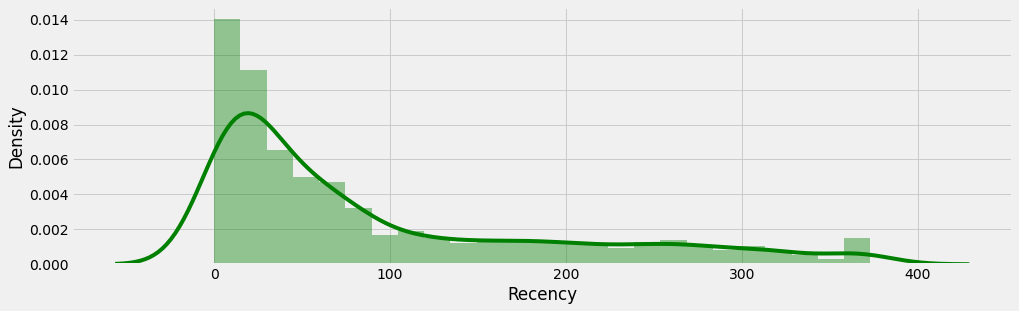

In [211]:
#plotting Recency
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)

sns.distplot(rfmTable['Recency'],color='green')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


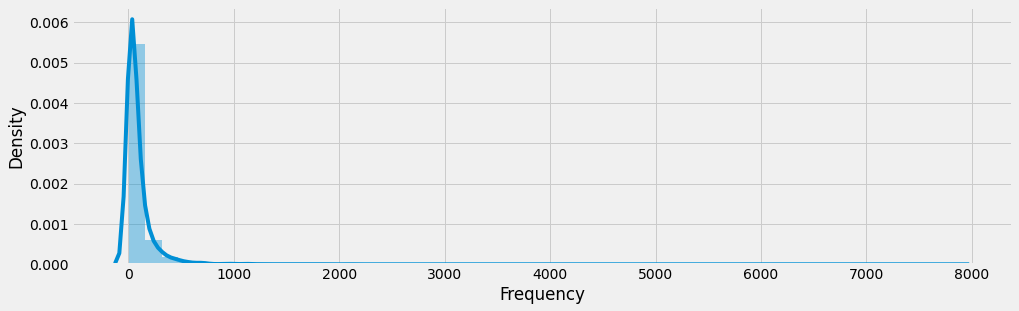

In [212]:
# Plotting Frequency

plt.figure(figsize=(15,15))

plt.subplot(3,1,3)

sns.distplot(rfmTable['Frequency'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


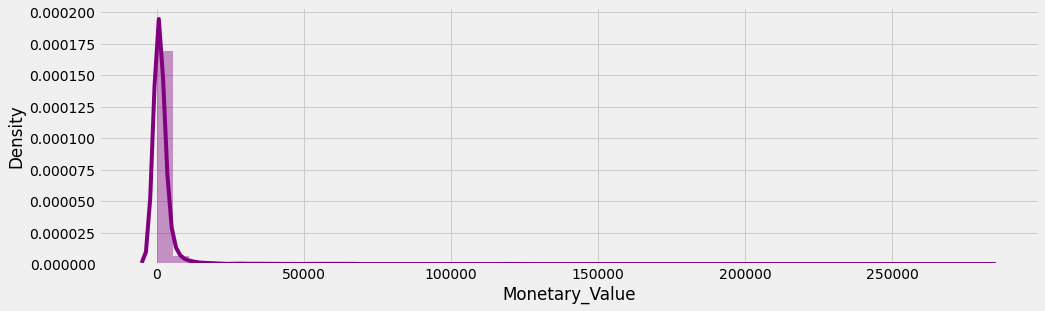

In [213]:
# Plotting Money/Monetary 

plt.figure(figsize=(15,15))
plt.subplot(3,1,3)
sns.distplot(rfmTable['Monetary_Value'],color = 'purple')
plt.show()

In [214]:
#creating labels 1,4 where 4 is the best quantile

r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

r_groups = pd.qcut(rfmTable['Recency'],4,r_labels)

f_groups = pd.qcut(rfmTable['Frequency'],4,f_labels)

m_groups = pd.qcut(rfmTable['Monetary_Value'],4,m_labels)

rfmTable = rfmTable.assign(R=r_groups,F=f_groups,M=m_groups)

rfmTable.head()

rfmTable.info()

rfmTable.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4338 non-null   int64   
 1   Frequency       4338 non-null   int64   
 2   Monetary_Value  4338 non-null   float64 
 3   R               4338 non-null   category
 4   F               4338 non-null   category
 5   M               4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7+ KB


Recency              int64
Frequency            int64
Monetary_Value     float64
R                 category
F                 category
M                 category
dtype: object

In [215]:
#changing to object type
rfmTable['R'] = rfmTable['R'].astype(str)
rfmTable['F'] = rfmTable['F'].astype(str)
rfmTable['M'] = rfmTable['M'].astype(str)

In [216]:
#creating RFM segment which shows r,f,m in concatenated fornat
rfmTable['RFM_Segment'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,310,17,334.40,1,1,2,112


In [217]:
rfmTable[rfmTable['RFM_Segment'] == '111'].sort_values(by='CustomerID')


,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12353,204,4,89.00,1,1,1,111
12361,287,10,189.90,1,1,1,111
12401,303,5,84.30,1,1,1,111
12402,323,11,225.60,1,1,1,111
12441,366,11,173.55,1,1,1,111
...,...,...,...,...,...,...,...
18224,263,10,158.95,1,1,1,111
18227,217,5,93.75,1,1,1,111
18269,366,7,168.60,1,1,1,111


In [218]:
#finding unique no of segments
rfm_segment = rfmTable.groupby('RFM_Segment')['RFM_Segment']
print('The Number of Unique Segment is - ',rfm_segment.nunique().sum())
print("\n",rfm_segment.unique())


The Number of Unique Segment is -  61

 RFM_Segment
111    [111]
112    [112]
113    [113]
114    [114]
121    [121]
       ...  
434    [434]
441    [441]
442    [442]
443    [443]
444    [444]
Name: RFM_Segment, Length: 61, dtype: object


In [219]:
#again converting to int
rfmTable['R'] = rfmTable['R'].astype(int)
rfmTable['F'] = rfmTable['F'].astype(int)
rfmTable['M'] = rfmTable['M'].astype(int)

In [220]:
#calc rfm scores
rfmTable['RFM_Score'] = rfmTable[['R','F','M']].sum(axis=1)


In [221]:
rfmTable


,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,18,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1,111,3
18281,180,7,80.82,1,1,1,111,3
18282,7,12,178.05,4,1,1,411,6


In [222]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

rfmTable['RFM_Level'] = rfmTable.apply(rfm_level, axis=1)

#categorizing rfm level on basis of rfm scores 

In [223]:
rfmTable.head()


,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them
12348,75,31,1797.24,2,2,4,224,8,Champions
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them
12350,310,17,334.40,1,1,2,112,4,Needs Attention


In [224]:
#Grouping Customers by RFM Level

rfm_level_agg = rfmTable.groupby('RFM_Level').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)

In [225]:
rfm_level_agg


Recency Frequency Monetary_Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.9     192.0         4406.5  1676
Champions             63.7      57.0          994.1   459
Loyal                 79.3      38.7          760.4   452
Needs Attention      174.2      13.7          239.0   385
Potential             95.6      28.0          823.8   464
Promising            153.3      21.4          368.7   517
Require Activation   260.4       8.2          159.3   385

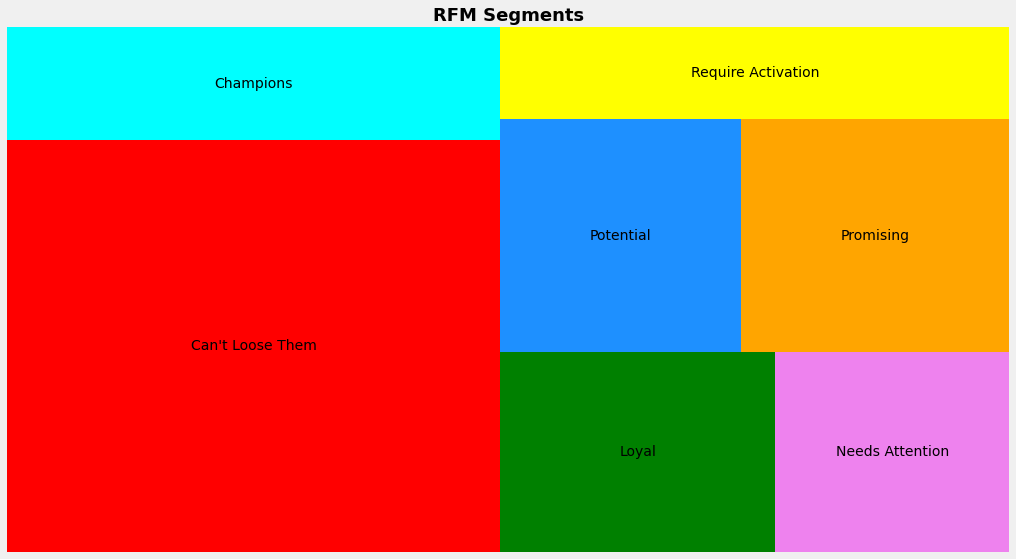

In [226]:
#visualizing different rfm levels with squarify
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
colors = ["red","cyan","green","violet","dodgerblue","orange","yellow"]

squarify.plot(sizes=rfm_level_agg['Count'], 
              label=["Can't Loose Them",
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=1,color=colors
                    )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [227]:
#using Kmeans

In [228]:
rfm_rfm = rfmTable[['Recency','Frequency','Monetary_Value']]
print(rfm_rfm.describe())

           Recency    Frequency  Monetary_Value
count  4338.000000  4338.000000     4338.000000
mean     92.059474    91.720609     2054.266460
std     100.012264   228.785094     8989.230441
min       0.000000     1.000000        3.750000
25%      17.000000    17.000000      307.415000
50%      50.000000    41.000000      674.485000
75%     141.750000   100.000000     1661.740000
max     373.000000  7847.000000   280206.020000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

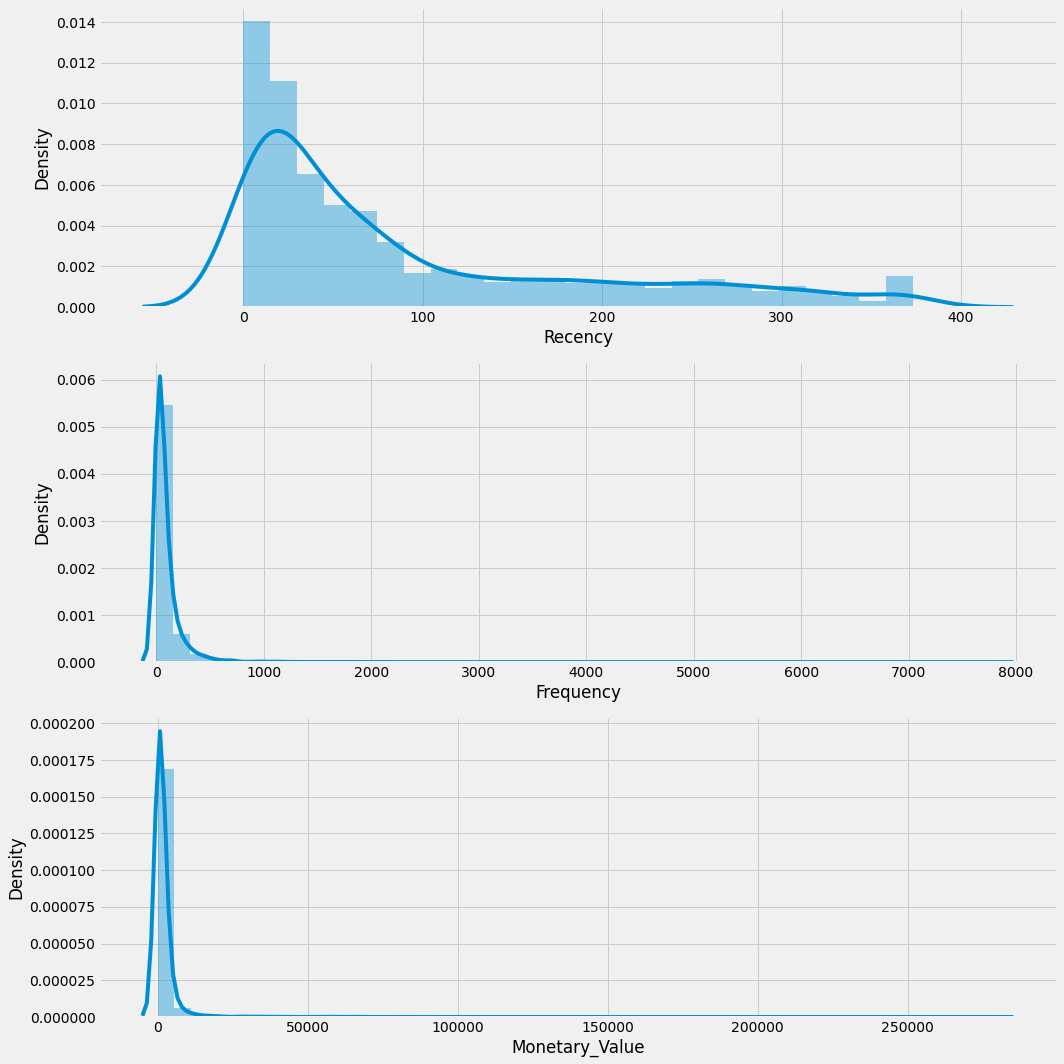

In [229]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfmTable.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfmTable.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfmTable.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

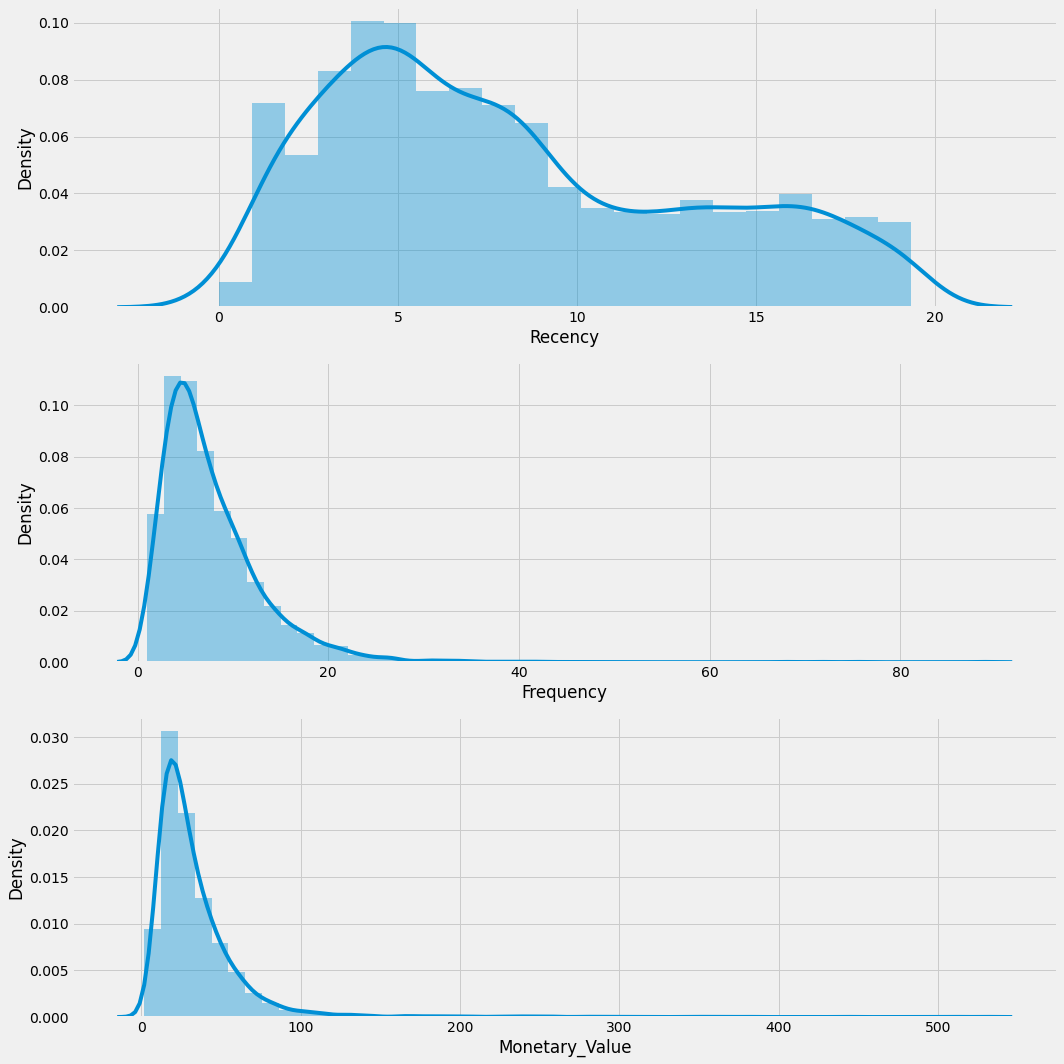

In [230]:
#applying Square Root Transformation and verifying the Distribution again
rfm_sqrt = rfmTable[['Recency', 'Frequency', 'Monetary_Value']].apply(np.sqrt, axis = 1).round(3)

f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm_sqrt.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_sqrt.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_sqrt.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [231]:
rfm_sqrt.skew()


Recency           0.568207
Frequency         3.223301
Monetary_Value    5.887800
dtype: float64

In [233]:
#pre processing data for kmeans 
from sklearn.preprocessing import StandardScaler  


In [234]:
#scaling
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_sqrt)
rfm_normalized.shape

(4338, 3)

In [235]:
from sklearn.cluster import KMeans 

In [236]:
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)

In [237]:
inertia

[13013.999999999998,
 8258.24003956994,
 5672.519703051787,
 4217.659877913246,
 3490.3620896540756,
 3113.435636649051,
 2789.865653361161]

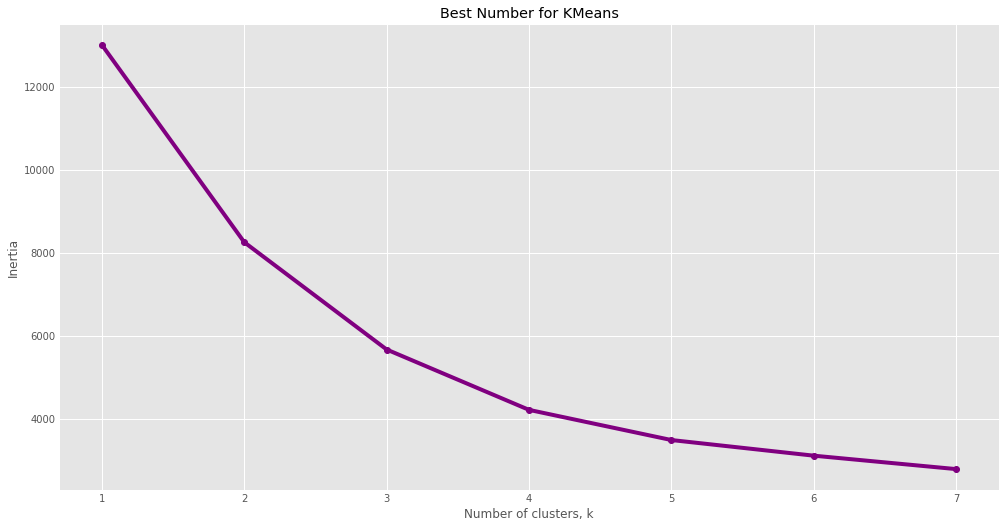

In [239]:
#using elbow method to find optimal no of k
ks = range(1,8)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o',color = 'purple')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

In [240]:
#choosing no of cluster as 3

In [241]:
# kmeans clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)

KMeans(n_clusters=3, random_state=1)

In [242]:
rfmTable['K_Cluster'] = kc.labels_
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential,1
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them,1
12348,75,31,1797.24,2,2,4,224,8,Champions,0
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them,0
12350,310,17,334.40,1,1,2,112,4,Needs Attention,2


[]

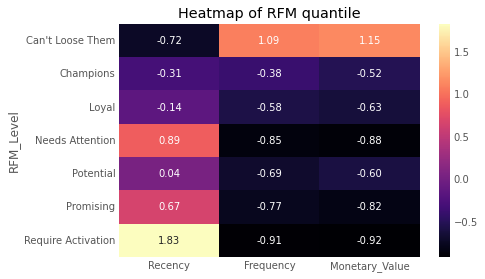

In [246]:
total_avg = rfmTable.iloc[:, 0:3].mean()
total_avg

cluster_avg = rfmTable.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1

sns.heatmap(prop_rfm, cmap= 'magma', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

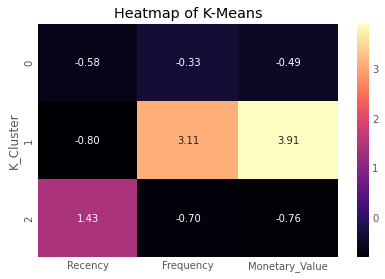

In [247]:
cluster_avg_K = rfmTable.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'magma', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()